In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
from scipy.spatial.distance import pdist, squareform
from scipy.fftpack import fft
from sklearn.manifold import MDS
from sklearn.neighbors import NearestNeighbors

In [3]:
#making time series dataframe from unsupervised data, index is timestamp.

data = pd.read_csv(r"Path/of/data.csv", parse_dates=['time'] , index_col='time')
data.drop(data.columns[0],axis=1,inplace=True)
#print(data.head())

In [4]:
#selecting important attributes(i.e input and output variables).

input_variables = ['kilnMainDriveCurrent',
                   'kilnRPM',
                   'kilnFeed',
                   'calcinerCoal',
                   'preHeaterFanRPM',
                   'mainBurnerCoal']

output_variables = ['kilnInletO2',
                    'kilnInletTemperature',
                    'kilnInletNOx',
                    'sinteringZoneTemperature(MainBurnerTemperature)']

df = data[input_variables + output_variables]
print(df.head())

                     kilnMainDriveCurrent   kilnRPM    kilnFeed  calcinerCoal  \
time                                                                            
2020-09-15 00:00:58            935.763916  4.731806  492.954285     15.048611   
2020-09-15 00:00:59            938.368103  4.728172  492.578125     15.048611   
2020-09-15 00:01:00            935.763916  4.728172  492.578125     15.058160   
2020-09-15 00:01:01            929.253479  4.731806  492.954285     15.077257   
2020-09-15 00:01:02            925.347229  4.731806  493.142365     15.067708   

                     preHeaterFanRPM  mainBurnerCoal  kilnInletO2  \
time                                                                
2020-09-15 00:00:58       636.574097       12.919271     0.622106   
2020-09-15 00:00:59       636.284729       12.928820     0.643808   
2020-09-15 00:01:00       636.574097       12.928820     0.679977   
2020-09-15 00:01:01       636.574097       12.919271     0.672743   
2020-09-15 00:01:0

In [5]:
#Using interpolation to manage NaN values(otherwise it will lead to unnecessarily high frequencies in the frequency spectrum)

flag1 = (df.isna().sum() / df.shape[0]) * 100
print(flag1)

print('--------------------------INTERPOLATION-------------------------------------')

df = df.interpolate(method='linear', limit_direction='forward', axis=0)
flag2 = (df.isna().sum() / df.shape[0]) * 100
print(flag2)

kilnMainDriveCurrent                               24.998108
kilnRPM                                            24.998108
kilnFeed                                           24.998424
calcinerCoal                                       24.998424
preHeaterFanRPM                                    24.998424
mainBurnerCoal                                     24.998424
kilnInletO2                                        24.998424
kilnInletTemperature                               24.998424
kilnInletNOx                                       24.998424
sinteringZoneTemperature(MainBurnerTemperature)    24.998424
dtype: float64
--------------------------INTERPOLATION-------------------------------------
kilnMainDriveCurrent                               0.0
kilnRPM                                            0.0
kilnFeed                                           0.0
calcinerCoal                                       0.0
preHeaterFanRPM                                    0.0
mainBurnerCoal         

In [6]:
#creating a sample of each hour.

df_1 = df.resample('H').mean()
df_1 = df_1.dropna()
df_1.head()

,kilnMainDriveCurrent,kilnRPM,kilnFeed,calcinerCoal,preHeaterFanRPM,mainBurnerCoal,kilnInletO2,kilnInletTemperature,kilnInletNOx,sinteringZoneTemperature(MainBurnerTemperature)
time,,,,,,,,,,
2020-09-15 00:00:00,908.015057,4.728322,492.984180,15.186208,639.173754,12.826165,8.206152,1171.535954,248.668945,1064.627875
2020-09-15 01:00:00,923.576053,4.728044,492.985213,15.245227,646.429651,12.736746,16.785675,1163.955143,92.500550,894.337856
2020-09-15 02:00:00,949.361645,4.810239,501.118676,15.500316,653.774513,12.736855,11.278236,1164.523631,330.072969,855.455089
2020-09-15 03:00:00,962.529927,4.829154,503.055835,15.707576,655.529506,12.756043,20.702775,1166.391160,192.596318,700.031514
2020-09-15 04:00:00,919.631345,4.829247,503.057559,15.510069,655.535373,12.896641,17.347538,1166.716620,130.398776,700.067379


In [7]:
#DISSIMILARITY MATRIX COMPUTATION

df_dist = pd.DataFrame(squareform(pdist(np.abs(df_1    ), 'euclidean')))
df_dist.index = df_1.index.copy()
df_dist.columns = df_1.index.copy()
df_dist.head()

time,2020-09-15 00:00:00,2020-09-15 01:00:00,2020-09-15 02:00:00,2020-09-15 03:00:00,2020-09-15 04:00:00,2020-09-15 05:00:00,2020-09-15 06:00:00,2020-09-15 07:00:00,2020-09-15 08:00:00,2020-09-15 09:00:00,...,2020-11-28 08:00:00,2020-11-28 09:00:00,2020-11-28 10:00:00,2020-11-28 11:00:00,2020-11-28 12:00:00,2020-11-28 13:00:00,2020-11-28 14:00:00,2020-11-28 15:00:00,2020-11-28 16:00:00,2020-11-28 17:00:00
time,,,,,,,,,,,,,,,,,,,,,
2020-09-15 00:00:00,0.000000,231.976592,228.970492,373.628676,384.061470,315.117960,291.096370,125.359363,67.002080,177.533543,...,207.012015,208.389524,250.395017,365.731205,352.232458,297.559579,305.707876,361.569262,359.683271,368.401162
2020-09-15 01:00:00,231.976592,0.000000,242.421632,222.479771,198.457220,269.776314,251.905462,136.755066,285.544029,392.490687,...,359.539920,386.918106,421.620750,548.295401,524.295645,452.032434,377.127954,399.349101,389.320847,398.841689
2020-09-15 02:00:00,228.970492,242.421632,0.000000,208.155967,254.848084,93.411928,76.660715,147.421917,289.704528,320.292921,...,387.818874,328.075617,341.384709,452.486058,391.032231,392.817325,454.921940,502.133623,500.943508,512.137062
2020-09-15 03:00:00,373.628676,222.479771,208.155967,0.000000,75.632309,148.399390,154.813639,251.107119,438.714681,502.069557,...,519.493745,494.439306,511.850507,630.253520,574.125267,549.004685,543.462130,568.776739,562.426643,573.454410
2020-09-15 04:00:00,384.061470,198.457220,254.848084,75.632309,0.000000,210.522197,215.046343,263.188256,447.215423,529.978285,...,524.785176,514.161177,532.567863,652.938269,602.400847,565.705740,537.410219,559.039357,549.663944,559.722587


In [8]:
#MDS

d = 2
model = MDS(n_components = d, dissimilarity = 'precomputed', random_state = 1)
mds_out = model.fit_transform(df_dist)
mds_out

array([[  27.55924868,   20.87293237],
       [  14.90940699, -274.23153507],
       [-202.12599853, -197.98155131],
       ...,
       [-170.83426452, -158.20646063],
       [-163.40090481, -168.98614171],
       [-175.34896349, -172.03902453]])

In [9]:
k = np.sqrt(df_dist.shape[0])
k = int(np.floor(k))
radius = NearestNeighbors(n_neighbors = k+1, algorithm = 'ball_tree').fit(mds_out).kneighbors(mds_out)[0][:, -1]
f = k / (np.pi * radius**2)
f_max = np.amax(f)
probability = 1 - (f / f_max)
probability

array([0.61093468, 0.92334537, 0.97540222, ..., 0.95632603, 0.95631243,
       0.96249521])

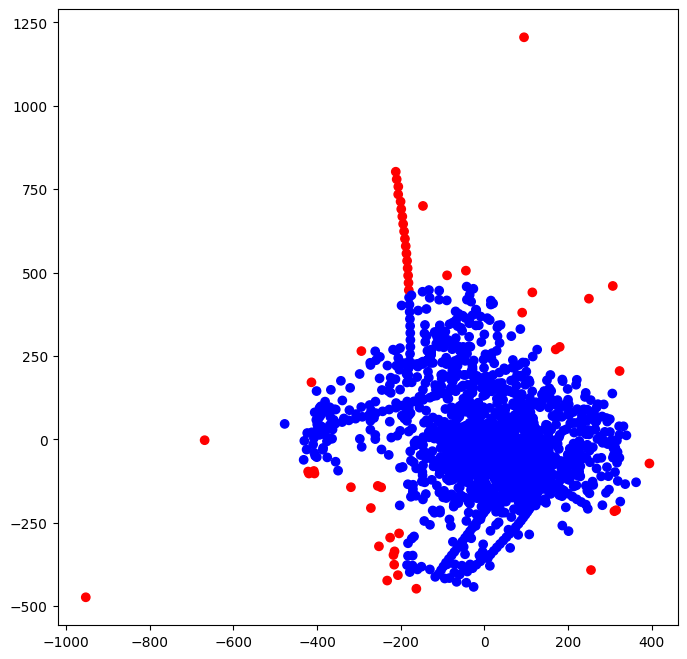

In [10]:
prob_cutoff = 0.98 
plt.figure(figsize=(8, 8))
plt.scatter(mds_out[:, 0], mds_out[:, 1], color = np.where(probability > prob_cutoff, 'r', 'b'))